# Create your first plots

Imagine that you have acquired some microscopy data. First you import those as Numpy arrays. Here we use a dataset that one can find online in the repository of this package. We use ```scikit-image``` here but you can import your files as you want:

In [1]:
import skimage.io

In [2]:
image = skimage.io.imread('https://github.com/guiwitz/microfilm/raw/master/demodata/coli_nucl_ori_ter.tif')
image.shape

(3, 30, 220, 169)

We have an image with 3 channels and 30 time points. We now only take the first time point:

In [3]:
image_t0 = image[:,0,:,:]

Now we can import the microfilm package. For simple plots, we need the ```microfilm.microplot``` submodule:

In [4]:
import microfilm.microplot

Plotting a color composite image of our numpy array is now as easy as using:

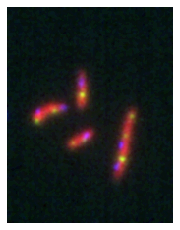

In [10]:
microfilm.microplot.microshow(image_t0);

With a few options more we can change the colormaps and add information on the figure:

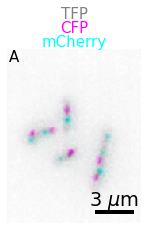

In [23]:
microfilm.microplot.microshow(image_t0, cmaps=['gray','pure_magenta','pure_cyan'], flip_map=True,
                              label_text='A', label_color='black', channel_label_show=True, channel_names=['TFP','CFP','mCherry'],
                              unit='um', scalebar_unit_per_pix=0.06, scalebar_size_in_units=3, scalebar_color='black');

## Next steps

You can do more than such single plots:
- [if you have time-lapse data you can animate such plots and export them as movies](../notebooks/create_animations.ipynb)
- [you can combine multiple plots into a figure with several panels](../notebooks/create_panels.ipynb)